In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# LC

In [68]:
# Example shape building classification Phileo_NFS
nfs_array = np.load('/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/denmark-1_1_train_label_lc_classification.npy')
print(nfs_array.shape)

(213, 11)


In [65]:
arr = np.load('/home/ccollado/phileo_phisat2/L1C/np_patches_128/denmark-1_1_train_label_lc.npy', mmap_mode='r')
class_labels = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100])
y_classification = np.array([np.isin(class_labels, arr[i, ...]) for i in range(arr.shape[0])])

arr.shape, y_classification.shape

((554, 128, 128, 1), (554, 11))

In [66]:
y_classification

array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Buildings

In [2]:
files = os.listdir('/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np')
building_files = [f for f in files if f.endswith('building.npy')]
building_classification_files = [f for f in files if f.endswith('building_classification.npy')]

In [60]:
# Example shape building classification Phileo_NFS
nfs_array = np.load('/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/denmark-1_1_train_label_building_classification.npy')
print(nfs_array.shape)

(213, 5)


In [3]:
building_files_base = [f[:-4] for f in building_files]
building_classification_files_base = [f[:-19] for f in building_classification_files]
# BEGIN: Check if the two base lists contain the same files
common_files = set(building_files_base).intersection(building_classification_files_base)
print(f"Number of common files: {len(common_files)}")
print(f"Common files: {common_files}")

# Check what files are in building_files_base but not in building_classification_files_base
only_in_building_files = set(building_files_base) - set(building_classification_files_base)
print(f"Files only in building_files_base: {only_in_building_files}")

# Check what files are in building_classification_files_base but not in building_files_base
only_in_building_classification_files = set(building_classification_files_base) - set(building_files_base)
print(f"Files only in building_classification_files_base: {only_in_building_classification_files}")
# END: Check if the two base lists contain the same files

Number of common files: 2595
Common files: {'north-america_93_train_label_building', 'east-africa_188_train_label_building', 'south-america_25_val_label_building', 'denmark-1_59_val_label_building', 'east-africa_195_train_label_building', 'east-africa_79_train_label_building', 'east-africa_179_train_label_building', 'denmark-2_77_train_label_building', 'senegal_18_train_label_building', 'senegal_44_val_label_building', 'east-africa_191_val_label_building', 'tanzania-3_7_train_label_building', 'denmark-2_57_val_label_building', 'ghana-1_212_val_label_building', 'north-america_53_val_label_building', 'ghana-1_40_test_label_building', 'europe_25_val_label_building', 'isreal-1_5_train_label_building', 'denmark-1_21_train_label_building', 'japan_9_val_label_building', 'nigeria_30_test_label_building', 'egypt-1_47_val_label_building', 'uganda-1_3_train_label_building', 'japan_23_val_label_building', 'denmark-1_71_val_label_building', 'denmark-1_11_val_label_building', 'east-africa_204_val_la

building_classification_files_base is a bit smaller, so we will take it

In [29]:
files_to_process = []
for file in tqdm(building_classification_files_base):
    arr_building_classification = np.load(f'/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/{file}_classification.npy', mmap_mode='r')
    class_array = np.argmax(arr_building_classification, axis=1)
    if class_array.max() == 4:
        files_to_process.append(file)
    elif class_array.max() == 3:
        if np.random.rand() < 0.5:
            files_to_process.append(file)
    elif class_array.max() == 2:
        if np.random.rand() < 0.25:
            files_to_process.append(file)
    else:
        if np.random.rand() < 0.1:
            files_to_process.append(file)

print(f"Number of files to process: {len(files_to_process)}")

100%|██████████| 2595/2595 [00:18<00:00, 140.81it/s]

Number of files to process: 467


In [30]:
dict_means = {k: [np.inf, -np.inf] for k in range(5)}
for file in tqdm(files_to_process):
    arr_building = np.load(f'/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/{file}.npy', mmap_mode='r')
    arr_building_classification = np.load(f'/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/{file}_classification.npy', mmap_mode='r')
    class_array = np.argmax(arr_building_classification, axis=1)
    mean_array = np.mean(arr_building > 0, axis=(1, 2))
    for i, k in enumerate(class_array):
        val = mean_array[i].item()
        if val < dict_means[k][0]:
            dict_means[k][0] = val
        if val > dict_means[k][1]:
            dict_means[k][1] = val

100%|██████████| 467/467 [07:39<00:00,  1.02it/s]


In [31]:
dict_means

{0: [0.0, 0.0],
 1: [6.103515625e-05, 0.2999267578125],
 2: [0.300048828125, 0.5999755859375],
 3: [0.60009765625, 0.89581298828125],
 4: [0.90087890625, 0.95123291015625]}

In [48]:
def to_one_hot_building(y):
    mean_value = np.mean(y > 0)
    if mean_value < 0 or mean_value > 1:
        raise ValueError('Invalid values in building mask')

    classes = [mean_value == 0, 0 < mean_value <= 0.3, 0.3 < mean_value <= 0.6, 0.6 < mean_value <= 0.9, mean_value > 0.9]    
    y_classification = np.array([float(x) for x in classes], dtype=np.float32)
    return y_classification


In [80]:
def to_one_hot_building(y):
    # Calculate the mean across the spatial dimensions (height and width) for each image
    mean_values = np.mean(y > 0, axis=(1, 2, 3))
    
    # Validate that all mean values are between 0 and 1
    if np.any(mean_values < 0) or np.any(mean_values > 1):
        raise ValueError('Invalid values in building mask')
    
    # Initialize the classification array with boolean type
    y_classification = np.zeros((y.shape[0], 5), dtype=np.bool_)
    
    # Define thresholds for classification
    thresholds = [0, 0.3, 0.6, 0.9, 1.0]
    
    # Assign classes based on mean value thresholds
    for i in range(len(thresholds)-1):
        lower = thresholds[i]
        upper = thresholds[i+1]
        mask = (mean_values > lower) & (mean_values <= upper)
        y_classification[:, i] = mask
    
    # Handle the special case where mean value is exactly 0
    y_classification[:, 0] = (mean_values == 0)
    
    return y_classification


In [74]:
arr = np.load('/home/ccollado/phileo_phisat2/L1C/np_patches_128/denmark-1_1_train_label_building.npy', mmap_mode='r')
arr.shape

(554, 128, 128, 1)

In [83]:
y_classification = to_one_hot_building(arr)
y_classification.shape

(554, 5)

In [3]:
folder = '/home/ccollado/phileo_phisat2/L1C/np_patches_128'
blg_clas_files = [f for f in os.listdir(folder) if f.endswith('building_classification.npy')]

In [10]:
list_arr = []
for file in tqdm(blg_clas_files):
    arr = np.load(os.path.join(folder, file), mmap_mode='r')
    list_arr.append(arr)

100%|██████████| 1383/1383 [00:00<00:00, 10642.55it/s]


In [16]:
arr_total = np.concatenate(list_arr, axis=0)
arr_total.sum(axis=0)

array([242150,   3951,   1217,     23,      0])

# Roads

In [105]:
files = os.listdir('/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np')
roads_files = [f for f in files if f.endswith('roads.npy')]
roads_classification_files = [f for f in files if f.endswith('roads_regression.npy')]

In [106]:
# Example shape building classification Phileo_NFS
nfs_array = np.load('/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/europe_78_train_label_roads_regression.npy')
print(nfs_array.shape)

(1034,)


In [115]:
roads_files_base = [f[:-4] for f in roads_files]
roads_classification_files_base = [f[:-15] for f in roads_classification_files]
# BEGIN: Check if the two base lists contain the same files
common_files = set(roads_files_base).intersection(roads_classification_files_base)
print(f"Number of common files: {len(common_files)}")
print(f"Common files: {common_files}")

# Check what files are in roads_files_base but not in roads_classification_files_base
only_in_roads_files = set(roads_files_base) - set(roads_classification_files_base)
print(f"Files only in roads_files_base: {only_in_roads_files}")

# Check what files are in roads_classification_files_base but not in roads_files_base
only_in_roads_classification_files = set(roads_classification_files_base) - set(roads_files_base)
print(f"Files only in roads_classification_files_base: {only_in_roads_classification_files}")
# END: Check if the two base lists contain the same files

Number of common files: 1601
Common files: {'east-africa_52_train_label_roads', 'europe_21_val_label_roads', 'east-africa_166_val_label_roads', 'nigeria_155_val_label_roads', 'nigeria_137_val_label_roads', 'east-africa_234_val_label_roads', 'europe_7_train_label_roads', 'east-africa_241_train_label_roads', 'nigeria_129_val_label_roads', 'south-america_91_val_label_roads', 'east-africa_157_train_label_roads', 'senegal_67_train_label_roads', 'nigeria_86_train_label_roads', 'senegal_40_test_label_roads', 'japan_35_train_label_roads', 'north-america_75_val_label_roads', 'east-africa_225_train_label_roads', 'europe_12_train_label_roads', 'east-africa_233_train_label_roads', 'europe_20_test_label_roads', 'south-america_61_val_label_roads', 'nigeria_86_val_label_roads', 'europe_0_test_label_roads', 'europe_28_val_label_roads', 'south-america_4_train_label_roads', 'east-africa_170_test_label_roads', 'south-america_8_train_label_roads', 'nigeria_102_val_label_roads', 'east-africa_234_train_labe

In [135]:
import numpy as np
from tqdm import tqdm

all_data = None

for file in tqdm(roads_classification_files_base):
    arr_roads_classification = np.load(f'/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/{file}_regression.npy', mmap_mode='r')
    if len(arr_roads_classification.shape) != 1:
        continue
    if all_data is None:
        all_data = arr_roads_classification  # Initialize the first array directly
    else:
        all_data = np.hstack((all_data, arr_roads_classification))  # Stack vertically or concatenate along the required axis


100%|██████████| 1601/1601 [00:21<00:00, 74.25it/s] 


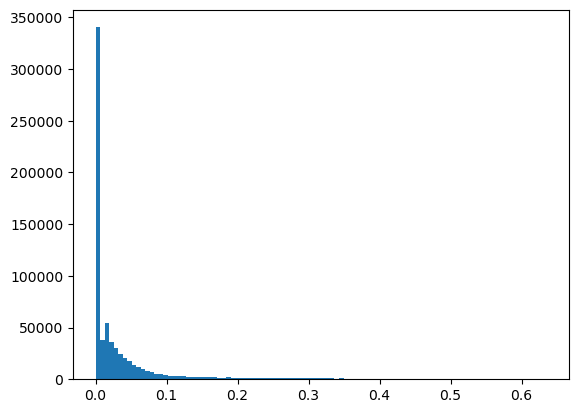

In [140]:
plt.hist(all_data, bins=100)
plt.show()

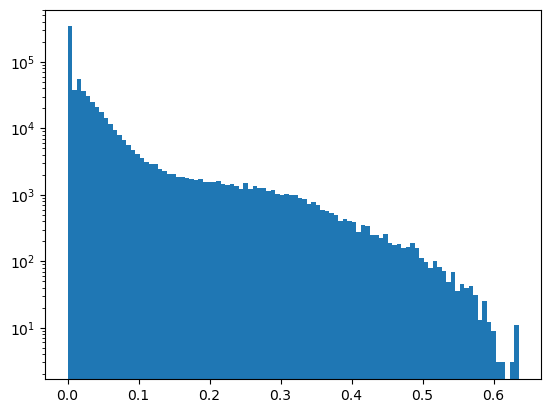

In [145]:
plt.hist(all_data, bins=100)
plt.yscale('log')
plt.show()

In [149]:
file = roads_classification_files_base[0]
arr_building = np.load(f'/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/{file}.npy', mmap_mode='r')
arr_building_classification = np.load(f'/home/ccollado/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/{file}_regression.npy', mmap_mode='r')


In [151]:
arr_building_classification[:5]

memmap([0.03875732, 0.02142334, 0.00830078, 0.        , 0.04882812])

In [158]:
np.mean(arr_building>0, axis=(1,2,3))[:5]

array([0.03875732, 0.02142334, 0.00830078, 0.        , 0.04882812])